<a href="https://colab.research.google.com/github/cs-iuu/word-sense-2025-fall-ai/blob/main/10.1.tokenization_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

## Install libraries

In [ ]:
!pip install sentencepiece transformers datasets umap-learn matplotlib

## Tokenization Example with SentencePiece

In [ ]:
import sentencepiece as spm

# Train a small BPE model on sample Mongolian text
with open("mongolian_sample.txt", "w") as f:
    f.write("Би чамд хайртай. Бид бүгдээрээ сурагчид.\n")

spm.SentencePieceTrainer.train(
    input="mongolian_sample.txt",
    model_prefix="mn_bpe",
    vocab_size=25
)

sp = spm.SentencePieceProcessor(model_file="mn_bpe.model")
print(sp.encode("Би чамд хайртай.", out_type=str))


['▁Би', '▁', 'ч', 'а', 'м', 'д', '▁', 'х', 'ай', 'р', 'т', 'ай', '.']


# Embeddings

## Embeddings using a multilingual model

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

text = ["Би чамд хайртай.", "Би чамаар бахархаж байна."]
encoded = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    embeddings = model(**encoded).last_hidden_state.mean(dim=1)
print(embeddings.shape)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

torch.Size([2, 384])


### Visualize embeddings

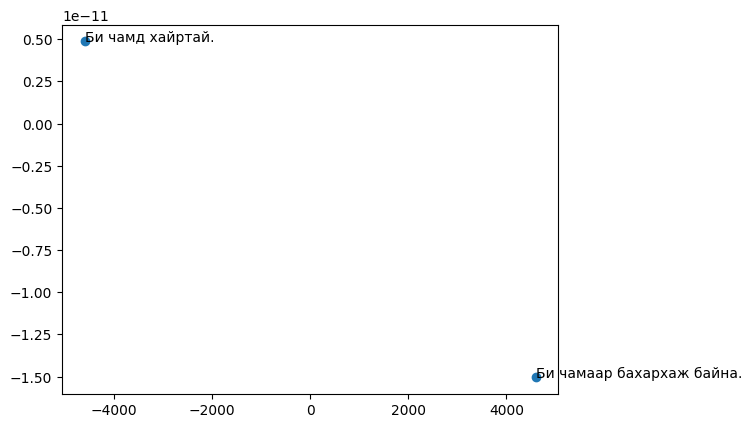

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

reduced = TSNE(n_components=2, perplexity=1).fit_transform(embeddings)
plt.scatter(reduced[:,0], reduced[:,1])
for i, txt in enumerate(text):
    plt.annotate(txt, (reduced[i,0], reduced[i,1]))
plt.show()